In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
weather = pd.read_parquet("dataset/climate_data_from_1982.parquet")

In [116]:
weather.head()

,scenario,nom_dep,code_dep,time,year,metric,value
29950,historical,Ain,01,1982-01-01 12:00:00,1982,near_surface_air_temperature,276.292267
29951,historical,Ain,01,1982-01-02 12:00:00,1982,near_surface_air_temperature,275.092407
29952,historical,Ain,01,1982-01-03 12:00:00,1982,near_surface_air_temperature,276.418518
29953,historical,Ain,01,1982-01-04 12:00:00,1982,near_surface_air_temperature,278.893372
29954,historical,Ain,01,1982-01-05 12:00:00,1982,near_surface_air_temperature,278.887207


In [117]:
weather['scenario'].unique()

array(['historical', 'ssp1_2_6', 'ssp2_4_5', 'ssp5_8_5'], dtype=object)

In [118]:
barley = pd.read_csv("dataset/barley_yield_from_1982.csv", sep=";")

In [119]:
barley.head()

,Unnamed: 0,department,year,yield,area,production
0,82,Ain,1982,3.95008,16065.0,63458.0
1,83,Ain,1983,NaN,14500.0,38400.0
2,84,Ain,1984,4.82258,15500.0,74750.0
3,85,Ain,1985,4.19677,15500.0,65050.0
4,86,Ain,1986,3.59845,12900.0,46420.0


In [120]:
barley.isna().sum()

Unnamed: 0      0
department      0
year            0
yield         247
area          115
production    122
dtype: int64

In [121]:
def quick_profile(df, name="df"):
    print(f"\n=== {name} ===")
    print("Shape:", df.shape)
    print("\nDtypes:\n", df.dtypes)
    print("\nMissing % (top 15):")
    print((df.isna().mean()*100).sort_values(ascending=False).head(15))
    print("\nDuplicate rows:", df.duplicated().sum())

quick_profile(barley, "Yield")
quick_profile(weather.sample(200_000, random_state=1), "Climate (sample 200k)")


=== Yield ===
Shape: (3583, 6)

Dtypes:
 Unnamed: 0      int64
department     object
year            int64
yield         float64
area          float64
production    float64
dtype: object

Missing % (top 15):
yield         6.893665
production    3.404968
area          3.209601
Unnamed: 0    0.000000
department    0.000000
year          0.000000
dtype: float64

Duplicate rows: 0

=== Climate (sample 200k) ===
Shape: (200000, 7)

Dtypes:
 scenario            object
nom_dep             object
code_dep            object
time        datetime64[ns]
year                 int32
metric              object
value              float32
dtype: object

Missing % (top 15):
scenario    0.0
nom_dep     0.0
code_dep    0.0
time        0.0
year        0.0
metric      0.0
value       0.0
dtype: float64

Duplicate rows: 0


In [122]:
barley = barley.drop(columns=["Unnamed: 0"])

In [123]:
area_ok = barley["area"] > 0
yield_ok = barley["yield"] > 0

# 1) missing the yield
m = barley["yield"].isna() & barley["production"].notna() & barley["area"].notna() & area_ok
barley.loc[m, "yield"] = barley.loc[m, "production"] / barley.loc[m, "area"]

# 2) missing the area
m = barley["area"].isna() & barley["production"].notna() & barley["yield"].notna() & yield_ok
barley.loc[m, "area"] = barley.loc[m, "production"] / barley.loc[m, "yield"]

# 3) missing the production
m = barley["production"].isna() & barley["yield"].notna() & barley["area"].notna()
barley.loc[m, "production"] = barley.loc[m, "yield"] * barley.loc[m, "area"]

In [124]:
barley.isna().sum()

department      0
year            0
yield         122
area          115
production    119
dtype: int64

In [125]:
cols = ["yield","area","production"]
barley1 = barley.dropna(subset=cols, how="all").copy()
barley = barley1.dropna(subset=["yield"])

In [126]:
for c in ["yield", "area", "production"]:
    barley[c] = pd.to_numeric(barley[c], errors="coerce")

barley["year"] = pd.to_numeric(barley["year"], errors="coerce").astype("Int64")

# Climate: enforce types
weather["year"] = pd.to_numeric(weather["year"], errors="coerce").astype("Int64")
weather["value"] = pd.to_numeric(weather["value"], errors="coerce")

/var/folders/h3/gdw4qxj1567cqw78pk5xshb80000gn/T/ipykernel_62519/3330420987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barley[c] = pd.to_numeric(barley[c], errors="coerce")
/var/folders/h3/gdw4qxj1567cqw78pk5xshb80000gn/T/ipykernel_62519/3330420987.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barley["year"] = pd.to_numeric(barley["year"], errors="coerce").astype("Int64")


             yield           area     production
count  3461.000000    3461.000000    3461.000000
mean      5.211611   18805.036695  110250.782298
std       1.410576   20269.675466  133051.397485
min       0.813560       3.000000       9.000000
25%       4.218820    3795.000000   17240.000000
50%       5.244440   11844.000000   56744.900000
75%       6.233790   27501.000000  153285.200000
max       9.434165  119310.000000  919249.600000


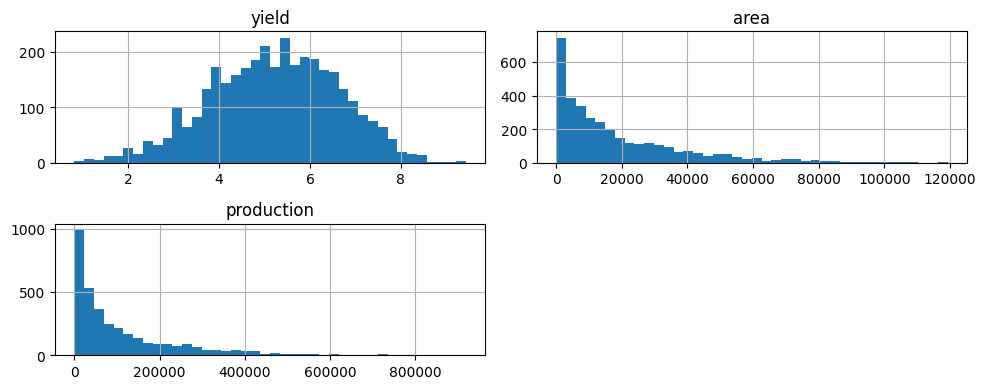

/var/folders/h3/gdw4qxj1567cqw78pk5xshb80000gn/T/ipykernel_62519/2303339036.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([barley["yield"].dropna(), barley["area"].dropna(), barley["production"].dropna()],


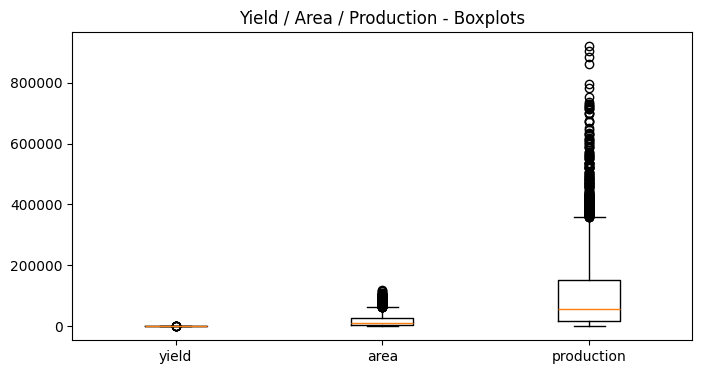

In [127]:
# Summary stats

print(barley[["yield", "area", "production"]].describe())

# Histograms
barley[["yield", "area", "production"]].hist(bins=40, figsize=(10,4))
plt.tight_layout()
plt.show()

# Boxplots (outliers)
plt.figure(figsize=(8,4))
plt.boxplot([barley["yield"].dropna(), barley["area"].dropna(), barley["production"].dropna()],
            labels=["yield", "area", "production"], showfliers=True)
plt.title("Yield / Area / Production - Boxplots")
plt.show()

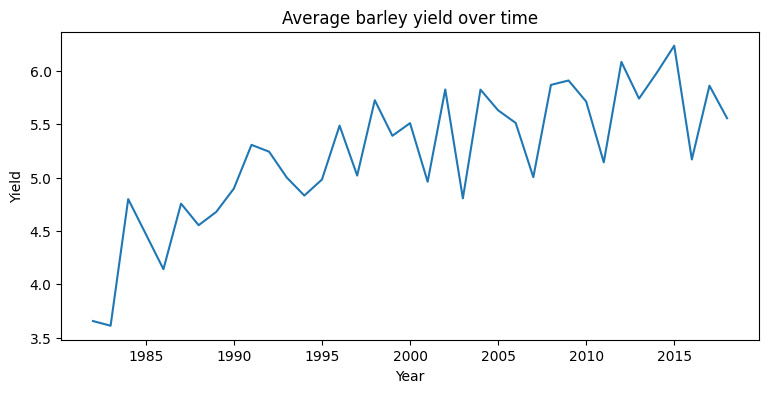

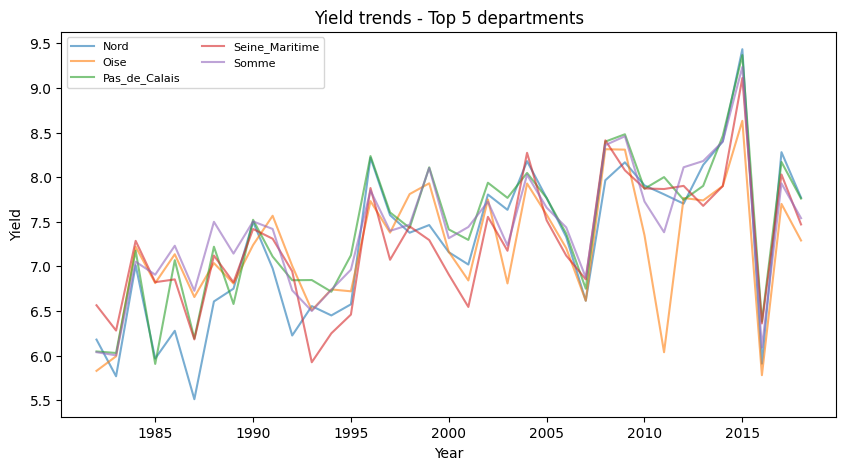

In [128]:
# Overall trend
trend = barley.groupby("year", as_index=False)["yield"].mean()
plt.figure(figsize=(9,4))
plt.plot(trend["year"], trend["yield"])
plt.title("Average barley yield over time")
plt.xlabel("Year"); plt.ylabel("Yield")
plt.show()

# Top 5 departments by average yield
top_deps = (barley.groupby("department")["yield"].mean().sort_values(ascending=False).head(5).index)
tmp = barley[barley["department"].isin(top_deps)].copy()

plt.figure(figsize=(10,5))
for dep, g in tmp.groupby("department"):
    plt.plot(g["year"], g["yield"], alpha=0.6, label=dep)
plt.title("Yield trends - Top 5 departments")
plt.xlabel("Year"); plt.ylabel("Yield")
plt.legend(ncol=2, fontsize=8)
plt.show()

Scenarios: ['historical' 'ssp1_2_6' 'ssp2_4_5' 'ssp5_8_5']
Metrics: ['near_surface_air_temperature'
 'daily_maximum_near_surface_air_temperature' 'precipitation']
Years: 1982 - 2050


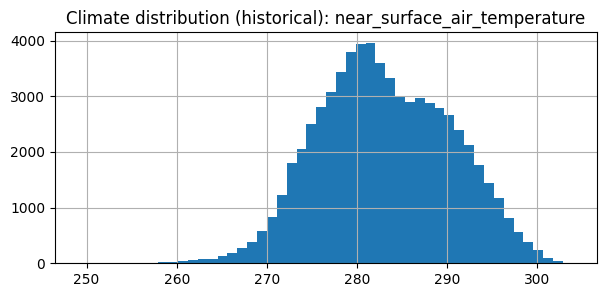

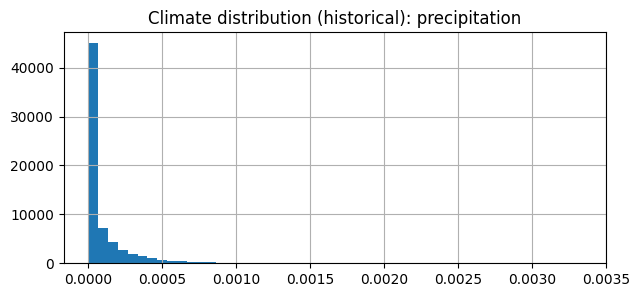

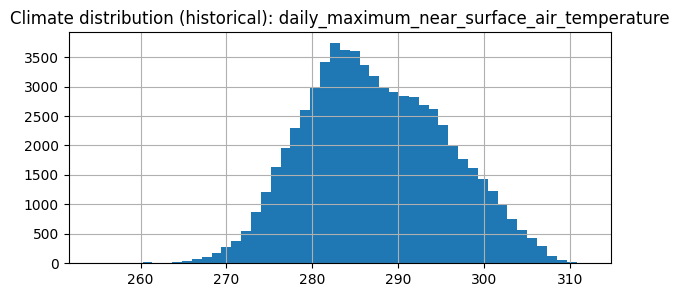

In [129]:
print("Scenarios:", weather["scenario"].unique())
print("Metrics:", weather["metric"].unique())
print("Years:", int(weather["year"].min()), "-", int(weather["year"].max()))

# Focus on historical period overlapping yield
ymin, ymax = int(barley["year"].min()), int(barley["year"].max())
clm_h = weather[(weather["scenario"]=="historical") & (weather["year"].between(ymin, ymax))].copy()

# Check metric distributions (sample for speed)
sample = clm_h.sample(200_000, random_state=1)
for metric in sample["metric"].unique():
    plt.figure(figsize=(7,3))
    sample[sample["metric"]==metric]["value"].hist(bins=50)
    plt.title(f"Climate distribution (historical): {metric}")
    plt.show()

### Feature Engineering

In [131]:
weather["time"] = pd.to_datetime(weather["time"], errors="coerce")
weather["year"] = weather["time"].dt.year.astype("Int64")

w = (weather
     .pivot_table(index=["scenario","code_dep","nom_dep","time","year"],
                  columns="metric", values="value", aggfunc="mean")
     .reset_index()
)

# temperature Kelvin -> Celsius 
for col in ["near_surface_air_temperature",
            "daily_maximum_near_surface_air_temperature"]:
    if col in w.columns:
        w[col] = w[col] - 273.15

# mm/s -> mm/day
w["precipitation_mm_day"] = w["precipitation"] * 86400.0

In [134]:
GROW_START, GROW_END = 3, 7
TBASE = 5.0
HEAT_TH = 30.0
DRY_TH = 1.0  # mm/day

w["month"] = w["time"].dt.month
gs = w[(w["month"] >= GROW_START) & (w["month"] <= GROW_END)].copy()

# extreme hot days
gs["hot_day"] = (gs["daily_maximum_near_surface_air_temperature"] > HEAT_TH).astype(int)

# Dry day: Precipitation below threshold
gs["dry_day"] = (gs["precipitation_mm_day"] < DRY_TH).astype(int)

# GDD：max(Tmean - Tbase, 0) growing degree days
gs["gdd_day"] = np.maximum(gs["near_surface_air_temperature"] - TBASE, 0.0)

def max_consecutive_ones(x: pd.Series) -> int:
    run = 0
    best = 0
    for v in x.values:
        if v == 1:
            run += 1
            best = max(best, run)
        else:
            run = 0
    return best

# Annual Aggregate Characteristics (by Scenario + Province + Year)
feat = (gs.groupby(["scenario","code_dep","nom_dep","year"], as_index=False)
        .agg(
            tmean_gs=("near_surface_air_temperature","mean"),
            tmax_gs=("daily_maximum_near_surface_air_temperature","mean"),
            prcp_gs=("precipitation_mm_day","sum"),
            hot_days=("hot_day","sum"),
            gdd=("gdd_day","sum"),
            max_consec_dry=("dry_day", max_consecutive_ones),
            n_days=("dry_day","size")
        )
)
feat.head()

,scenario,code_dep,nom_dep,year,tmean_gs,tmax_gs,prcp_gs,hot_days,gdd,max_consec_dry,n_days
0,historical,01,Ain,1982,11.995357,16.836538,1098.971313,3,1115.857788,8,153
1,historical,01,Ain,1983,11.331988,16.087030,1080.625122,0,1029.932861,12,153
2,historical,01,Ain,1984,11.959189,16.997242,1156.371826,0,1087.771729,7,153
3,historical,01,Ain,1985,11.119705,15.996710,1166.247559,0,970.348083,14,153
4,historical,01,Ain,1986,11.808128,16.717556,893.017456,0,1068.690063,20,153


In [135]:
import unicodedata, re

def norm_dep(s: str) -> str:
    s = str(s)
    s = unicodedata.normalize("NFKD", s).encode("ascii","ignore").decode("ascii")
    s = s.lower().replace("'", "")
    s = re.sub(r"[\s\-]+", "_", s)
    s = re.sub(r"[^a-z0-9_]", "", s)
    return s

barley["dep_norm"] = barley["department"].map(norm_dep)
feat["dep_norm"] = feat["nom_dep"].map(norm_dep)

# Use historical data to train
train_df = barley.merge(
    feat[feat["scenario"]=="historical"],
    on=["dep_norm","year"],
    how="inner"
)

train_df.head(), train_df.shape

/var/folders/h3/gdw4qxj1567cqw78pk5xshb80000gn/T/ipykernel_62519/662479594.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barley["dep_norm"] = barley["department"].map(norm_dep)


(  department  year     yield     area  production dep_norm    scenario  \
 0        Ain  1982  3.950080  16065.0     63458.0      ain  historical   
 1        Ain  1983  2.648276  14500.0     38400.0      ain  historical   
 2        Ain  1984  4.822580  15500.0     74750.0      ain  historical   
 3        Ain  1985  4.196770  15500.0     65050.0      ain  historical   
 4        Ain  1986  3.598450  12900.0     46420.0      ain  historical   
 
   code_dep nom_dep   tmean_gs    tmax_gs      prcp_gs  hot_days          gdd  \
 0       01     Ain  11.995357  16.836538  1098.971313         3  1115.857788   
 1       01     Ain  11.331988  16.087030  1080.625122         0  1029.932861   
 2       01     Ain  11.959189  16.997242  1156.371826         0  1087.771729   
 3       01     Ain  11.119705  15.996710  1166.247559         0   970.348083   
 4       01     Ain  11.808128  16.717556   893.017456         0  1068.690063   
 
    max_consec_dry  n_days  
 0               8     153  
 1

### Train the model

In [136]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [142]:
feature_cols = ["tmean_gs","tmax_gs","prcp_gs","hot_days","gdd","max_consec_dry"]
target_col = "yield"

df = train_df.dropna(subset=feature_cols + [target_col]).copy()

test_start_year = 2011     # test: 2011-2014
tr = df[df["year"] < test_start_year].copy()
te = df[df["year"] >= test_start_year].copy()

print("Train rows:", len(tr), " | Test rows:", len(te))
print("Train years:", tr["year"].min(), "-", tr["year"].max())
print("Test years:", te["year"].min(), "-", te["year"].max())

X_tr, y_tr = tr[feature_cols], tr[target_col]
X_te, y_te = te[feature_cols], te[target_col]

model = XGBRegressor(
    n_estimators=1500,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.0,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

model.fit(X_tr, y_tr)

pred = model.predict(X_te)
mae = mean_absolute_error(y_te, pred)
rmse = mean_squared_error(y_te, pred) ** 0.5

print("Test MAE:", mae)
print("Test RMSE:", rmse)

Train rows: 2581  | Test rows: 354
Train years: 1982 - 2010
Test years: 2011 - 2014
Test MAE: 1.0137384799407168
Test RMSE: 1.2587505693919443


In [143]:
scenarios = ["ssp1_2_6","ssp2_4_5","ssp5_8_5"]

future_feat = feat[feat["scenario"].isin(scenarios)].copy()
future_feat = future_feat.dropna(subset=feature_cols).copy()

future_feat["pred_yield"] = model.predict(future_feat[feature_cols])
future_feat.head()

,scenario,code_dep,nom_dep,year,tmean_gs,tmax_gs,prcp_gs,hot_days,gdd,max_consec_dry,n_days,dep_norm,pred_yield
2937,ssp1_2_6,01,Ain,2015,13.263169,18.679577,892.335144,4,1294.023438,17,153,ain,4.389008
2938,ssp1_2_6,01,Ain,2016,13.131767,18.152515,1146.179565,2,1250.838623,11,153,ain,4.918216
2939,ssp1_2_6,01,Ain,2017,12.833161,17.885670,928.741028,0,1208.664551,5,153,ain,3.396817
2940,ssp1_2_6,01,Ain,2018,12.809212,17.919216,1271.843384,1,1199.781372,7,153,ain,4.974741
2941,ssp1_2_6,01,Ain,2019,11.779666,16.699438,1001.862915,2,1090.855957,13,153,ain,4.908280


In [146]:
baseline_years = (2010, 2018)

baseline = (train_df[(train_df["year"]>=baseline_years[0]) & (train_df["year"]<=baseline_years[1])]
            .groupby("dep_norm", as_index=False)["yield"].mean()
            .rename(columns={"yield":"baseline_yield"}))

proj = future_feat.merge(baseline, on="dep_norm", how="left")

proj["yield_change_pct"] = (proj["pred_yield"] - proj["baseline_yield"]) / proj["baseline_yield"] * 100
proj[["scenario","nom_dep","year","pred_yield","baseline_yield","yield_change_pct"]].head(50)

,scenario,nom_dep,year,pred_yield,baseline_yield,yield_change_pct
0,ssp1_2_6,Ain,2015,4.389008,6.029836,-27.211817
1,ssp1_2_6,Ain,2016,4.918216,6.029836,-18.435323
2,ssp1_2_6,Ain,2017,3.396817,6.029836,-43.666512
3,ssp1_2_6,Ain,2018,4.974741,6.029836,-17.497906
4,ssp1_2_6,Ain,2019,4.908280,6.029836,-18.600102
5,ssp1_2_6,Ain,2020,4.251725,6.029836,-29.488543
6,ssp1_2_6,Ain,2021,4.506130,6.029836,-25.269440
7,ssp1_2_6,Ain,2022,5.734302,6.029836,-4.901202
8,ssp1_2_6,Ain,2023,6.116150,6.029836,1.431455
9,ssp1_2_6,Ain,2024,5.303356,6.029836,-12.048086


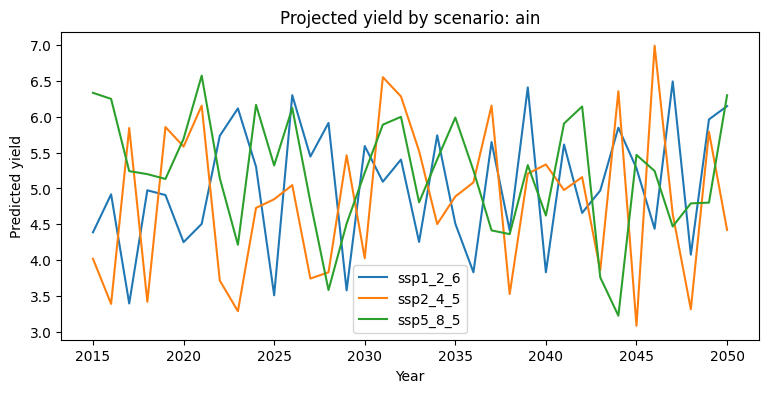

In [145]:
import matplotlib.pyplot as plt

dep_show = "ain"
p = proj[proj["dep_norm"]==dep_show].copy()

plt.figure(figsize=(9,4))
for sc, g in p.groupby("scenario"):
    g = g.sort_values("year")
    plt.plot(g["year"], g["pred_yield"], label=sc)
plt.title(f"Projected yield by scenario: {dep_show}")
plt.xlabel("Year"); plt.ylabel("Predicted yield")
plt.legend()
plt.show()